In [2]:
import pandas as pd

In [21]:
path = 'Heart_disease_cleveland_new.csv'
df = pd.read_csv(path)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
X = df.drop(columns=['target'])
y = df['target']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
# Normalize the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}, Validation set shape: {X_test.shape}")

Training set shape: (242, 13), Validation set shape: (61, 13)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Input # type: ignore
from tensorflow.keras.optimizers import SGD # type: ignore
import numpy as np

In [27]:
# Define a simple MLP model

def create_model(hidden_layers_neuron, activation='relu', optimizer_type='sgd', learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], )))
    # model.add(Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))

    for layer_neuron in hidden_layers_neuron:
        model.add(Dense(layer_neuron, activation=activation))

    model.add(Dense(1, activation='sigmoid'))

    # Optimizer selection
    optimizer = None
    if optimizer_type.lower() == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_type.lower() == 'gd':
        optimizer = SGD(learning_rate=learning_rate, momentum=0.0)
        
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [28]:
# Train
from tensorflow.keras.callbacks import EarlyStopping  # type: ignore

def train_model(model, epochs=100, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=epochs,
        # validation_split=0.1,
        # callbacks=[early_stopping],
        verbose=0
    )
    
    return history

In [29]:
import matplotlib.pyplot as plt

def plot_model(history, sub_title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{sub_title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{sub_title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [30]:
configs = [
    {
        'name': 'config1',
        'hidden_layers_neuron': [32],
        'learning_rate': 0.01,
        'activation_function': 'relu',
        'optimization': 'sgd'
    },
    {
        'name': 'config2',
        'hidden_layers_neuron': [32, 64],
        'learning_rate': 0.001,
        'activation_function': 'relu',
        'optimization': 'gd'
    },
    {
        'name': 'config3',
        'hidden_layers_neuron': [16],
        'learning_rate': 0.001,
        'activation_function': 'relu',
        'optimization': 'gd'
    },
    {
        'name': 'config4',
        'hidden_layers_neuron': [16, 32],
        'learning_rate': 0.005,
        'activation_function': 'relu',
        'optimization': 'sgd'
    },
]


Training config1:
Hidden layers: [32]
Learning rate: 0.01, Optimizer: sgd


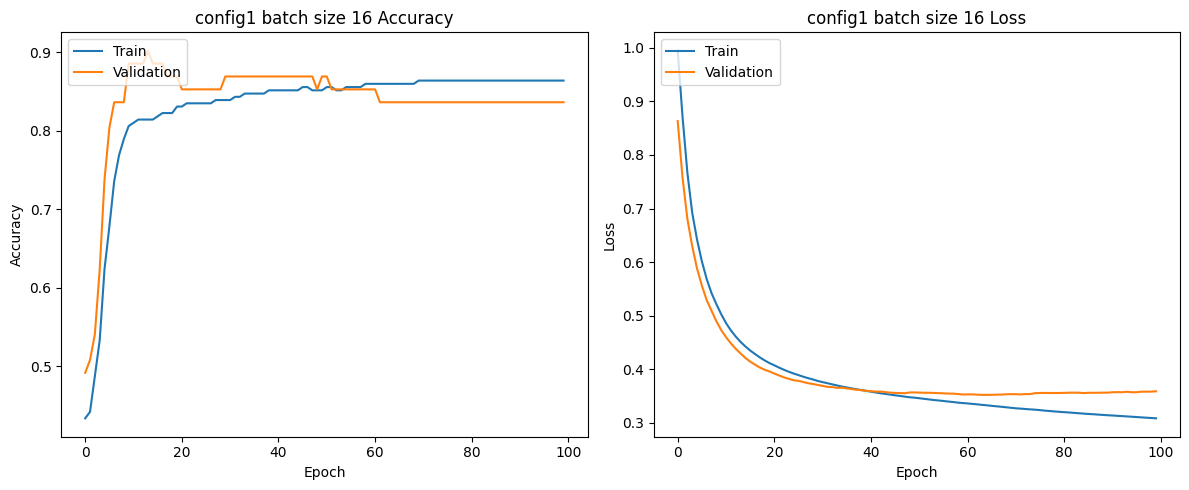

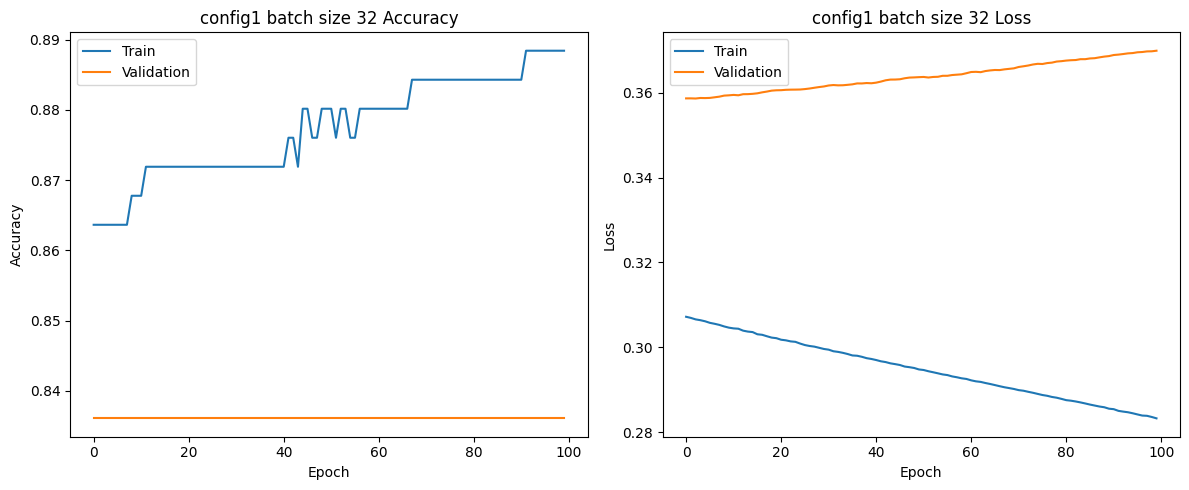

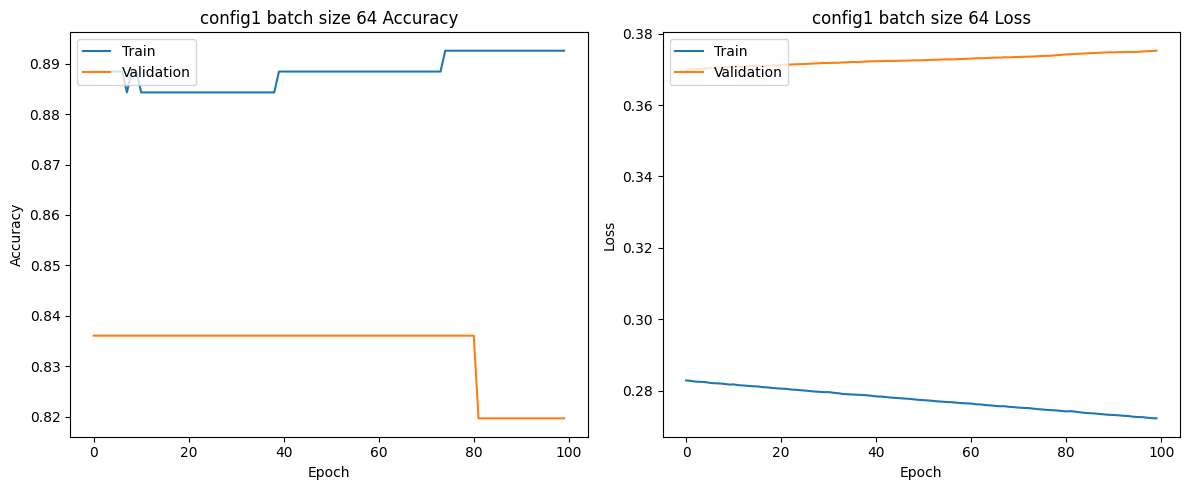


Training config2:
Hidden layers: [32, 64]
Learning rate: 0.001, Optimizer: gd


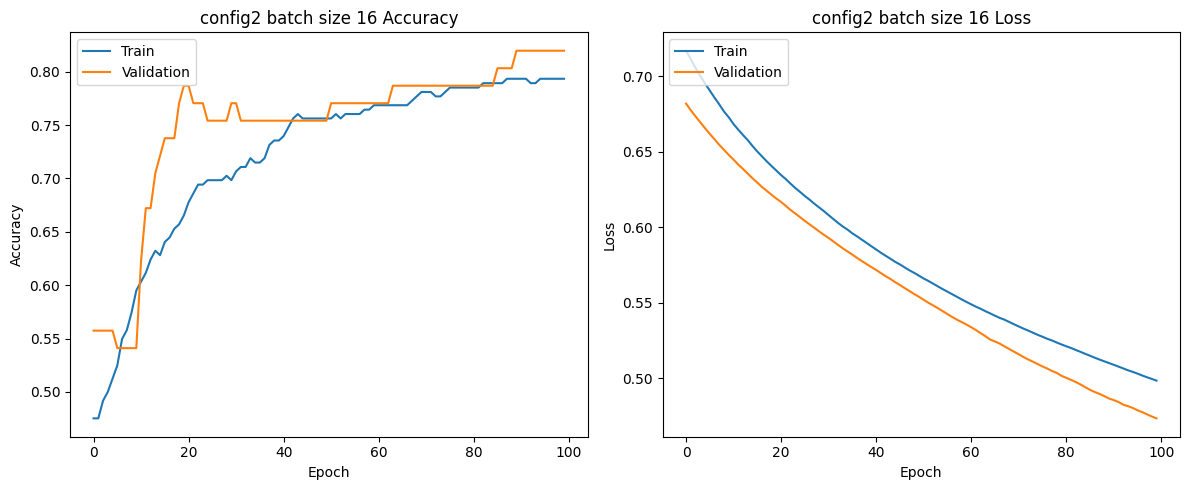

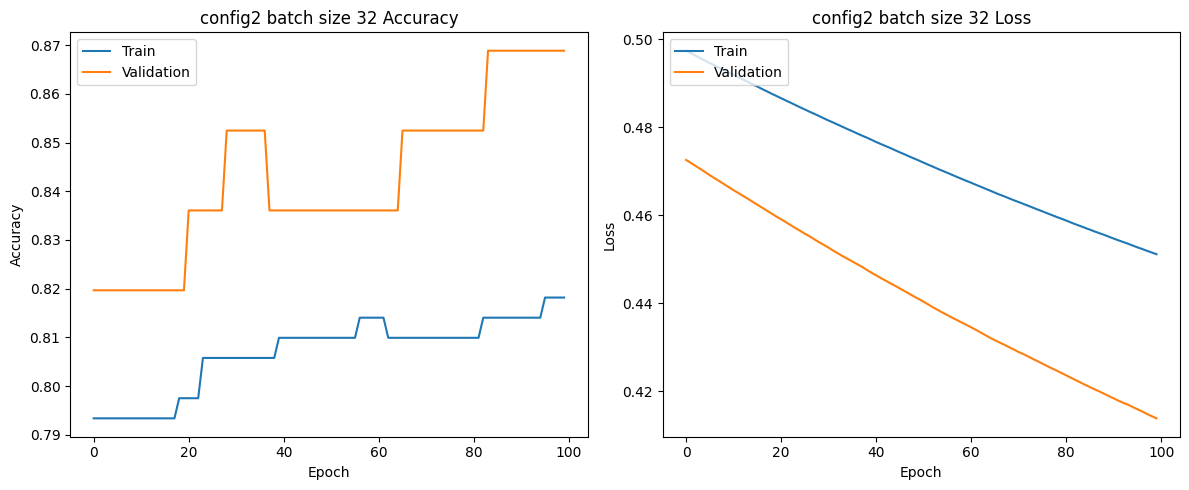

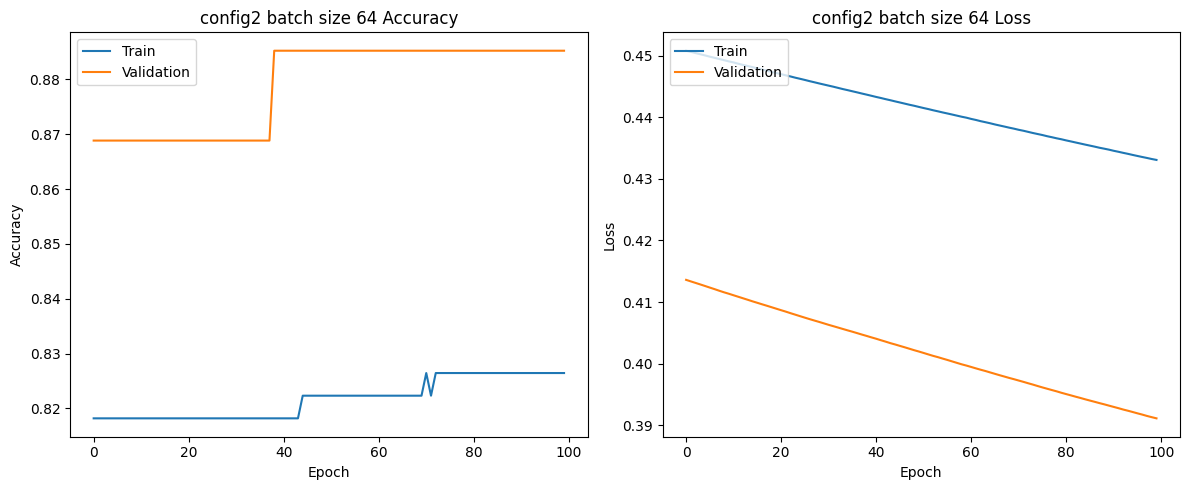


Training config3:
Hidden layers: [16]
Learning rate: 0.001, Optimizer: gd


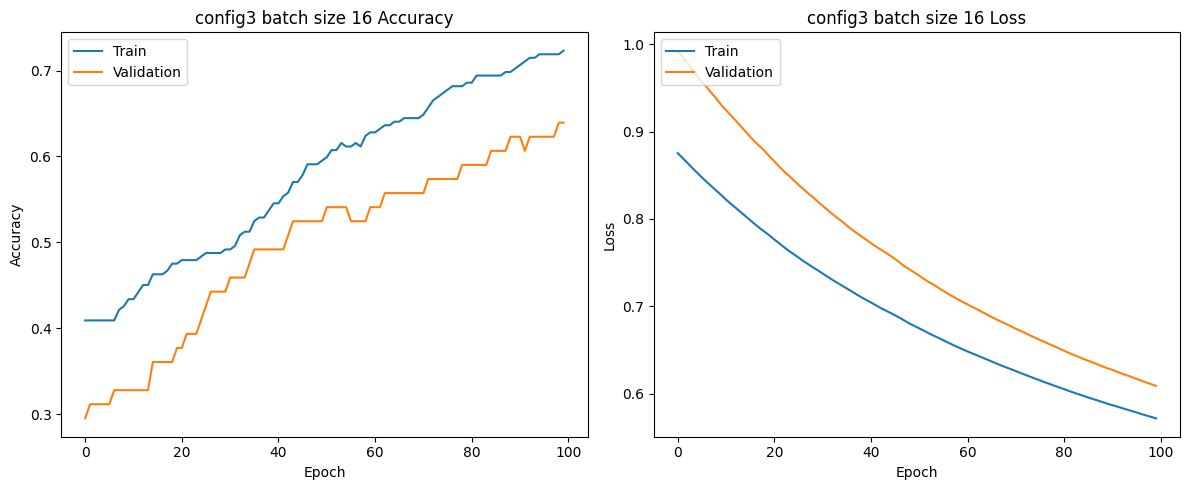

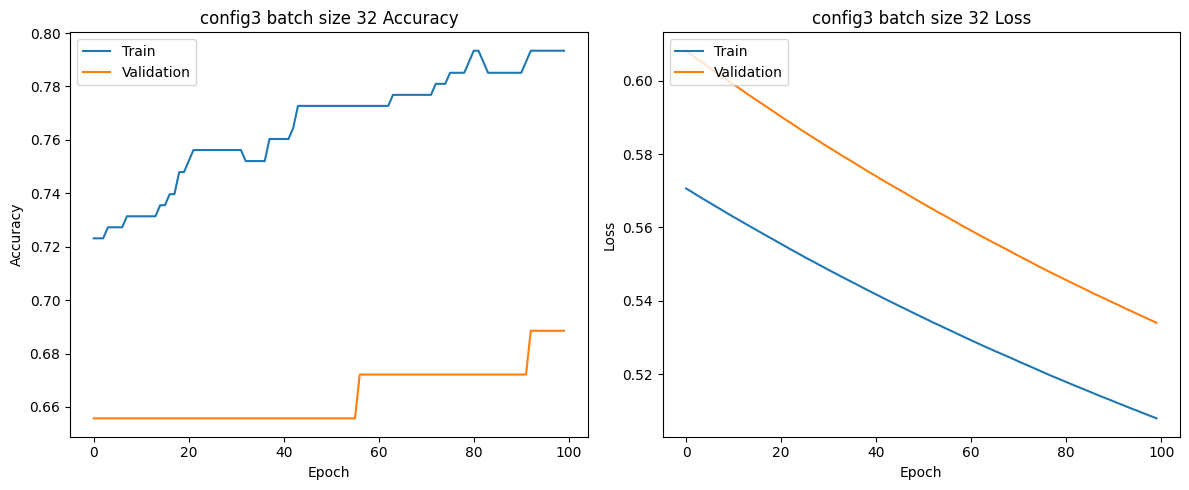

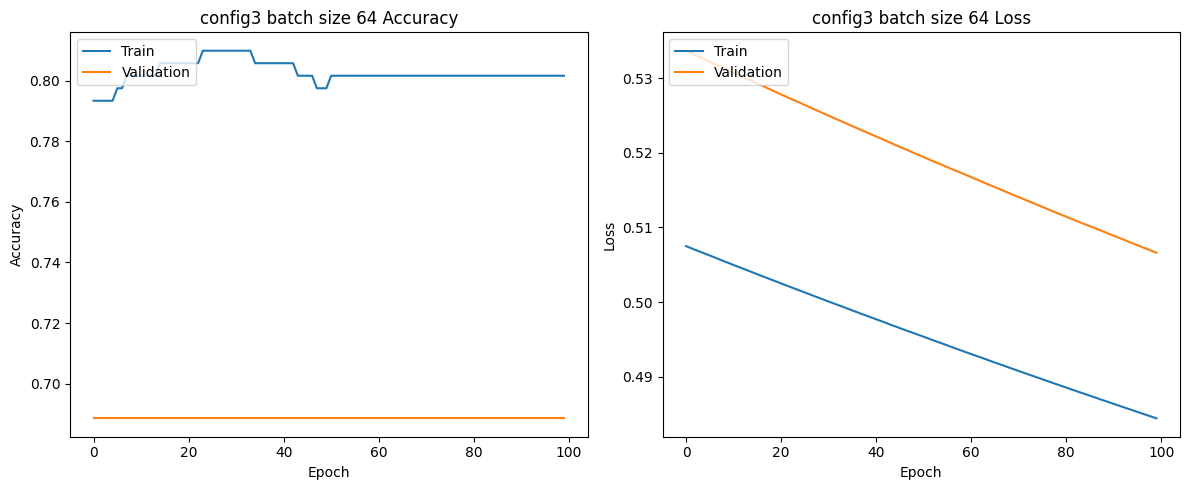


Training config4:
Hidden layers: [16, 32]
Learning rate: 0.005, Optimizer: sgd


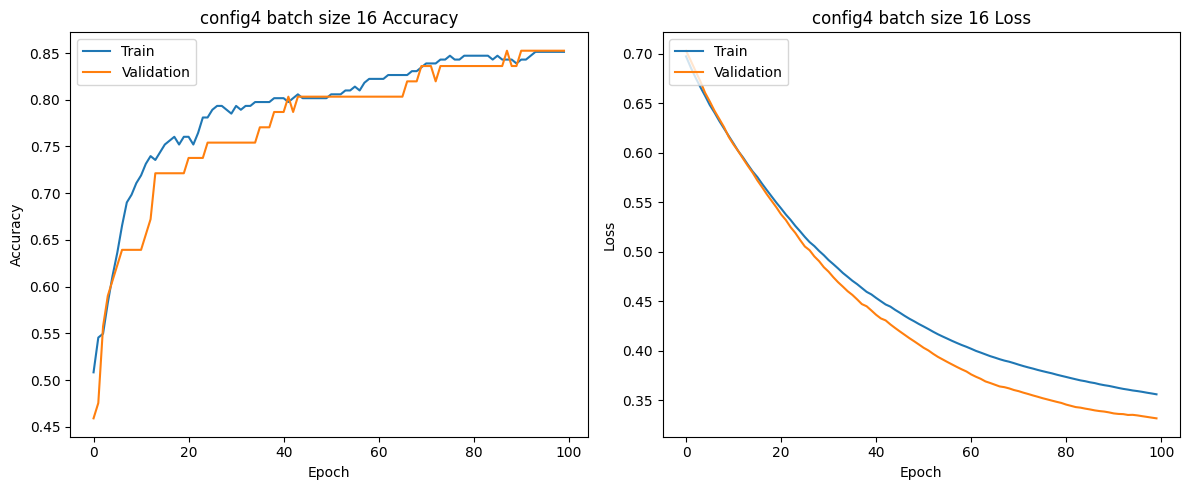

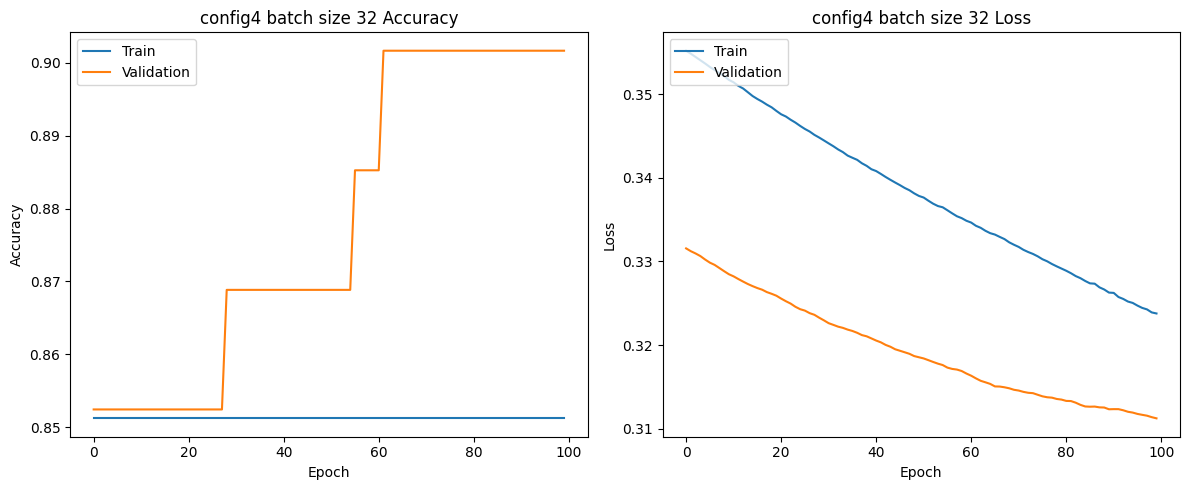

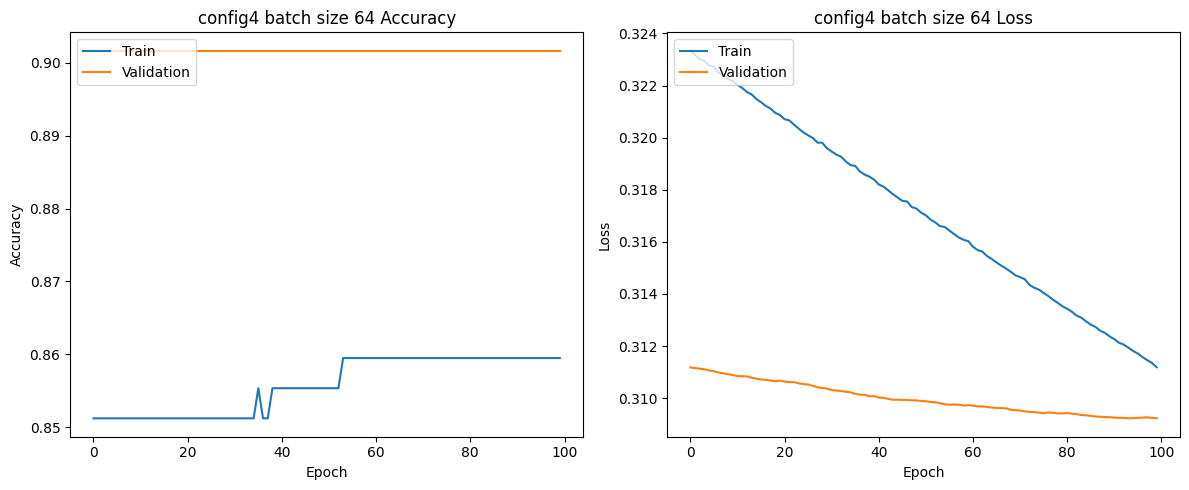

In [31]:
results = {}

for config in configs:
    print(f"\nTraining {config['name']}:")
    print(f"Hidden layers: {config['hidden_layers_neuron']}")
    print(f"Learning rate: {config['learning_rate']}, Optimizer: {config['optimization']}")
    
    model = create_model(
        hidden_layers_neuron=config['hidden_layers_neuron'],
        activation=config['activation_function'],
        optimizer_type=config['optimization'],
        learning_rate=config['learning_rate']
    )

    batch_sizes = [16, 32, 64]
    for batch_size in batch_sizes:
        history = train_model(model, epochs=100, batch_size=batch_size)

        # Store results
        results[f"{config['name']} - batch size{batch_size}"] = {
            'model': model,
            'history': history,
            'config': config
        }
        sub_title = f"{config['name']} batch size {batch_size}"

        plot_model(history, sub_title= sub_title)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


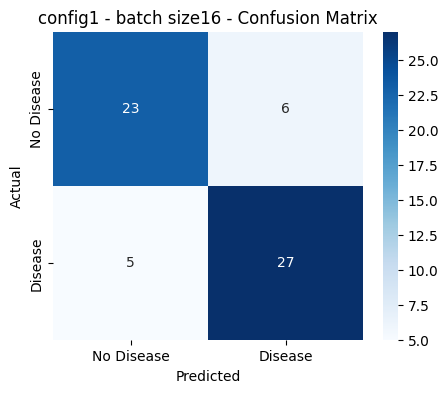

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


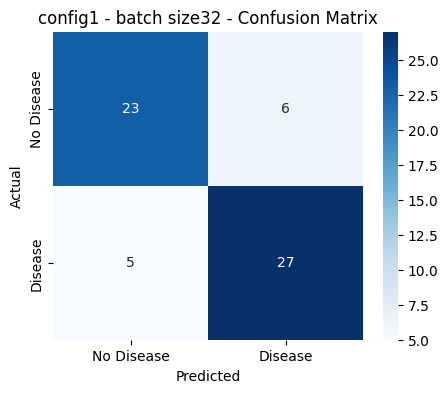

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


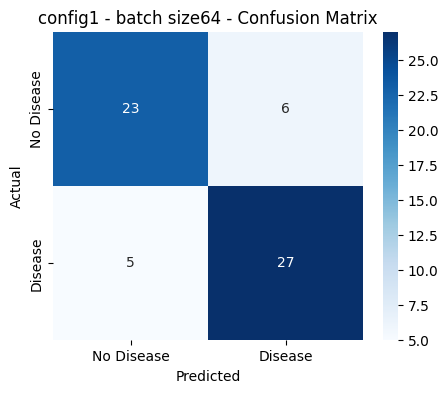

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


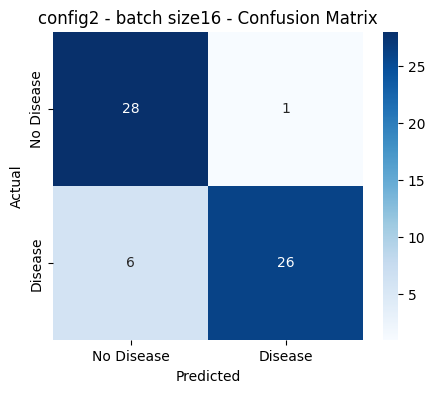

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


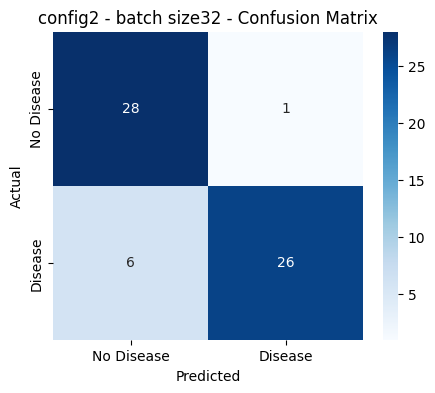

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


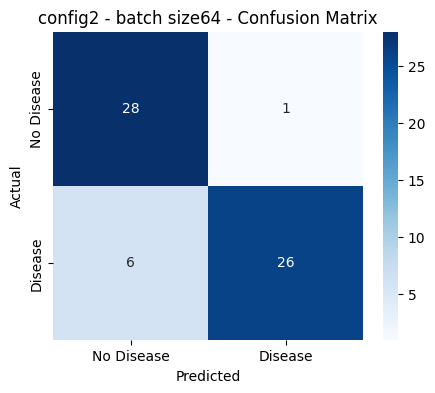

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


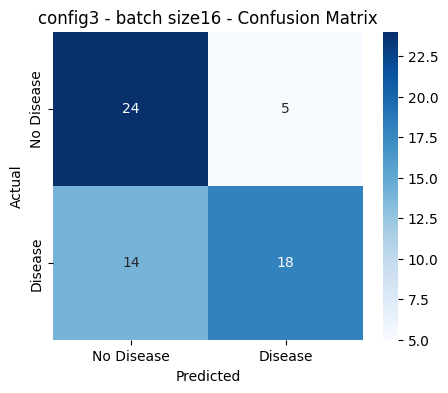

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


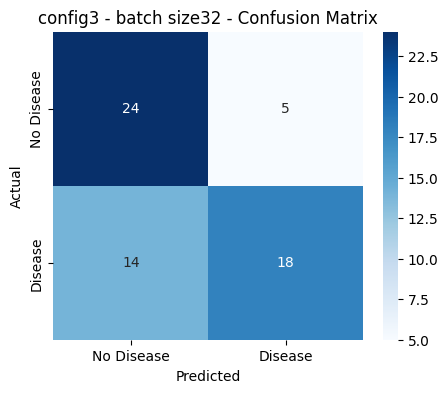

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


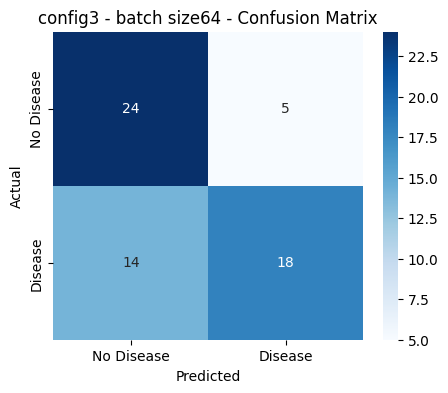

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


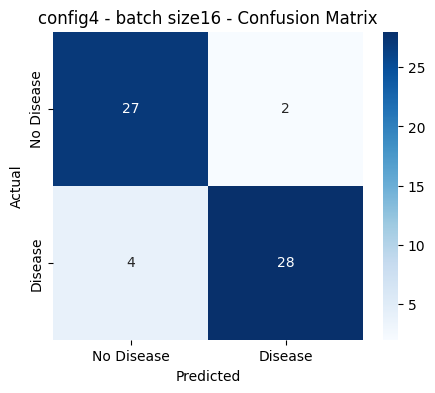

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


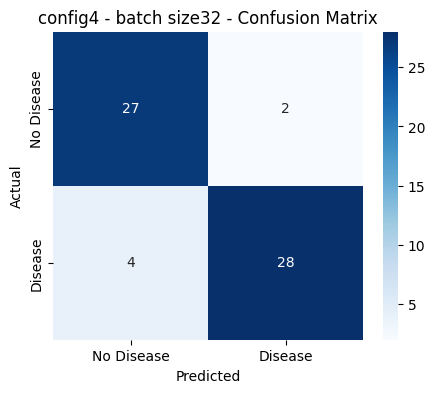

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


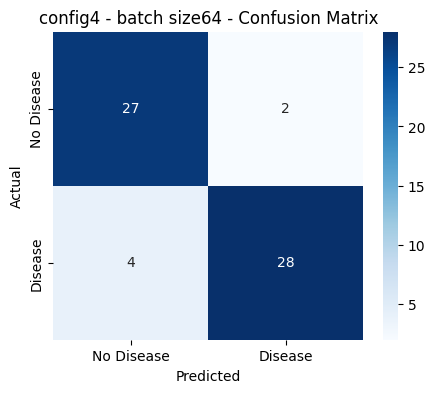


Model Comparison:


,Model,Hidden Layers,Optimizer,Learning Rate,Accuracy,Precision,Recall,F1 Score,Epochs Trained
0,config1 - batch size16,[32],sgd,0.010,0.819672,0.818182,0.84375,0.830769,100
1,config1 - batch size32,[32],sgd,0.010,0.819672,0.818182,0.84375,0.830769,100
2,config1 - batch size64,[32],sgd,0.010,0.819672,0.818182,0.84375,0.830769,100
3,config2 - batch size16,"[32, 64]",gd,0.001,0.885246,0.962963,0.81250,0.881356,100
4,config2 - batch size32,"[32, 64]",gd,0.001,0.885246,0.962963,0.81250,0.881356,100
5,config2 - batch size64,"[32, 64]",gd,0.001,0.885246,0.962963,0.81250,0.881356,100
6,config3 - batch size16,[16],gd,0.001,0.688525,0.782609,0.56250,0.654545,100
7,config3 - batch size32,[16],gd,0.001,0.688525,0.782609,0.56250,0.654545,100
8,config3 - batch size64,[16],gd,0.001,0.688525,0.782609,0.56250,0.654545,100
9,config4 - batch size16,"[16, 32]",sgd,0.005,0.901639,0.933333,0.87500,0.903226,100


<Figure size 1200x600 with 0 Axes>

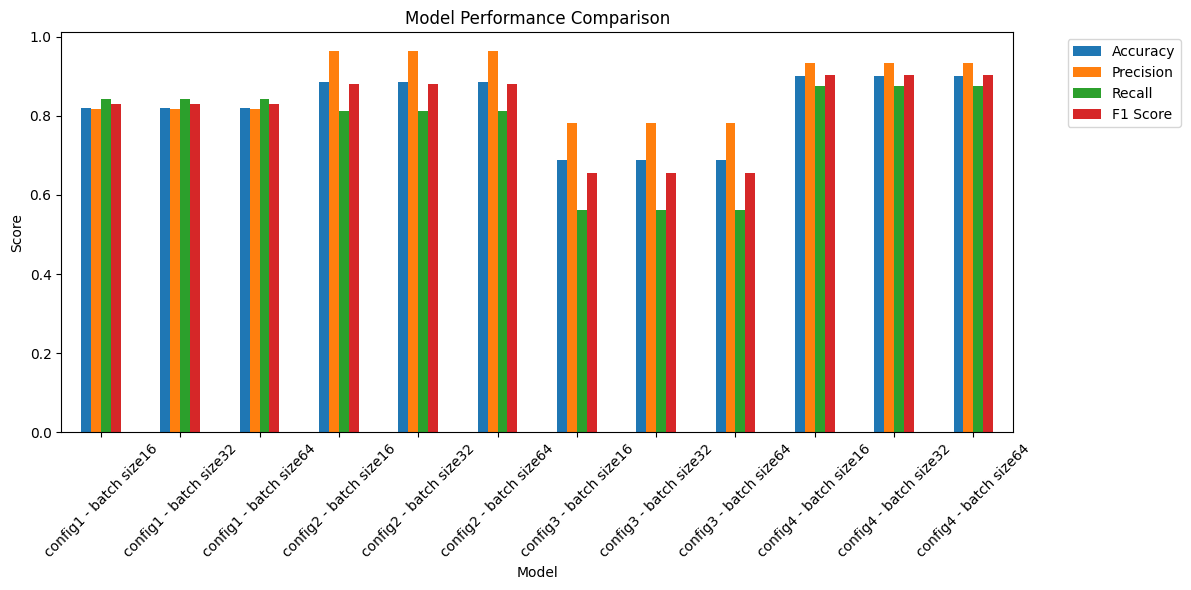

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Evaluate all models and create comparison table
metrics_table = []

for model_name, result in results.items():
    model = result['model']
    history = result['history']
    config = result['config']
    
    # Predictions
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Add to metrics table
    metrics_table.append({
        'Model': model_name,
        'Hidden Layers': config['hidden_layers_neuron'],
        'Optimizer': config['optimization'],
        'Learning Rate': config['learning_rate'],
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Epochs Trained': len(history.history['loss'])
    })
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Disease', 'Disease'], 
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Display metrics comparison table
metrics_df = pd.DataFrame(metrics_table)
print("\nModel Comparison:")
display(metrics_df.sort_values(by='Model', ascending=True))

# Plot metrics comparison
plt.figure(figsize=(12, 6))
metrics_df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], 
                kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
metrics_df.sort_values(by='F1 Score', ascending=False).head(1)

,Model,Hidden Layers,Optimizer,Learning Rate,Accuracy,Precision,Recall,F1 Score,Epochs Trained
11,config4 - batch size64,"[16, 32]",sgd,0.005,0.901639,0.933333,0.875,0.903226,100
